In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("./data/user_product_events_0428.csv", low_memory = False, sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202055 entries, 0 to 202054
Data columns (total 21 columns):
new_id                   202055 non-null object
add_to_cart_1            202055 non-null int64
add_to_cart_click_1      202055 non-null int64
add_to_cart_hover_1      202055 non-null int64
click_1                  202055 non-null int64
page_view_1              202055 non-null int64
pastime_30               202055 non-null int64
product_image_click_1    202055 non-null int64
product_image_hover_1    202055 non-null int64
reactive_1               202055 non-null int64
scroll_percent_40        202055 non-null int64
scroll_percent_60        202055 non-null int64
scroll_percent_80        202055 non-null int64
scroll_percent_100       202055 non-null int64
social_click_1           202055 non-null int64
tab_click_1              202055 non-null int64
wish_list_add_click_1    202055 non-null int64
mouse_way_sum            202055 non-null int64
mouse_velocity_avg       202055 non-null i

In [3]:
data.drop(['new_id','add_to_cart_1','add_to_cart_click_1', 'add_to_cart_hover_1'],1, inplace=True)

In [4]:
n = 5000
sample1 = data.loc[data.conversion == 1].sample(n=n, replace=False)
sample2 = data.loc[data.conversion == 0].sample(n=n, replace=False)
df = pd.concat([sample1, sample2])
df = df.sample(frac=1)
X = df.drop('conversion', axis=1)  
y = df.loc[:, 'conversion']

In [3]:
data.ix[:,:10].head(10)

,new_id,add_to_cart_1,add_to_cart_click_1,add_to_cart_hover_1,click_1,page_view_1,pastime_30,product_image_click_1,product_image_hover_1,reactive_1
0,1001fonal_hu_1008174413_1920,0,0,0,0,1,0,0,0,0
1,1001fonal_hu_1065998225_669,0,0,0,0,1,0,0,0,0
2,1001fonal_hu_1101536556_3383,0,0,0,0,1,0,0,0,0
3,1001fonal_hu_1156769342_1812,0,0,0,2,1,1,1,0,1
4,1001fonal_hu_1156769342_2033,1,4,1,19,2,6,0,0,1
5,1001fonal_hu_1156769342_2381,0,0,0,1,1,0,0,0,0
6,1001fonal_hu_1156769342_3177,0,0,0,1,1,0,0,0,0
7,1001fonal_hu_1156769342_3464,0,0,0,1,1,0,0,1,0
8,1001fonal_hu_1162927773_2404,0,0,0,0,1,0,0,0,0
9,1001fonal_hu_117411794_1461,0,0,0,0,1,0,0,0,0


In [14]:
data.ix[:,:10].tail(10)

,new_id,add_to_cart_1,add_to_cart_click_1,add_to_cart_hover_1,click_1,page_view_1,pastime_30,product_image_click_1,product_image_hover_1,reactive_1
202045,zselykebabahaz_hu_5674174572_7864,0,0,0,2,1,0,0,0,0
202046,zselykebabahaz_hu_5801378907_7896,0,0,0,0,1,0,0,1,0
202047,zselykebabahaz_hu_5884492846_3057,0,0,0,0,1,0,0,0,0
202048,zselykebabahaz_hu_5884492846_7733,0,0,0,2,1,0,0,0,0
202049,zselykebabahaz_hu_810683468_5853,0,0,0,0,1,0,0,0,1
202050,zselykebabahaz_hu_8201004115_7820,0,0,0,0,1,0,0,0,0
202051,zselykebabahaz_hu_8960891596_7769,0,0,0,0,1,2,0,0,1
202052,zselykebabahaz_hu_9477303263_364,0,0,0,0,1,0,0,0,0
202053,zselykebabahaz_hu_9477303263_614,0,0,0,0,1,0,0,0,0
202054,zselykebabahaz_hu_9876232552_7847,0,0,0,0,1,0,0,0,0


In [53]:
data.ix[:,8:].head(10)

,scroll_percent_40,scroll_percent_60,scroll_percent_80,scroll_percent_100,social_click_1,tab_click_1,wish_list_add_click_1,mouse_way_sum,mouse_velocity_avg,text_selection_1,conversion
0,0,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,41,4,0,0
4,2,2,2,0,0,0,0,181,10,0,1
5,1,1,1,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0


In [20]:
data.ix[:,10:].describe(include = 'all')

,scroll_percent_40,scroll_percent_60,scroll_percent_80,scroll_percent_100,social_click_1,tab_click_1,wish_list_add_click_1,mouse_way_sum,mouse_velocity_avg,text_selection_1,conversion
count,202055.000000,202055.000000,202055.000000,202055.000000,202055.000000,202055.000000,202055.000000,202055.000000,202055.000000,202055.000000,202055.000000
mean,0.631249,0.432268,0.243117,0.113039,0.000530,0.069427,0.002559,35.510059,3.275079,0.052451,0.047645
std,0.658034,0.601966,0.491962,0.345091,0.029925,0.401811,0.060504,122.267255,11.123654,0.296509,0.213015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,0.000000
max,21.000000,20.000000,23.000000,9.000000,9.000000,21.000000,9.000000,10593.000000,2952.000000,18.000000,1.000000


In [23]:
data.add_to_cart_hover_1.value_counts()

0     192920
1       8621
2        420
3         67
4         12
5          9
6          3
7          2
13         1
Name: add_to_cart_hover_1, dtype: int64

In [5]:
pd.crosstab(data.add_to_cart_hover_1, data.conversion)

conversion,0,1
add_to_cart_hover_1,,
0,189637,3283
1,2750,5871
2,37,383
3,4,63
4,0,12
5,0,9
6,0,3
7,0,2
13,0,1


In [3]:
data.drop(['new_id','add_to_cart_1','add_to_cart_click_1', 'add_to_cart_hover_1'],1, inplace=True)

In [5]:
n = 5000
sample1 = data.loc[data.conversion == 1].sample(n=n, replace=False)
sample2 = data.loc[data.conversion == 0].sample(n=n, replace=False)
df = pd.concat([sample1, sample2])
df = df.sample(frac=1)

In [6]:
df.shape

(10000, 17)

In [59]:
from tpot import TPOT
from sklearn.cross_validation import train_test_split

X = df.drop('conversion', axis=1).values  
y = df.loc[:, 'conversion'].values
  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    train_size=0.75,  
                                                    test_size=0.25)

In [40]:
X.shape

(4000, 16)

In [13]:
y.shape

(2000,)

In [22]:
my_tpot = TPOT(generations=10)  
my_tpot.fit(X_train, y_train)  
  
print(my_tpot.score(X_test, y_test))

0.866366655436


In [17]:
my_tpot.export('exported_pipeline.py')

In [28]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

In [41]:
model = LogisticRegression()
model = model.fit(X_train, y_train)
model.score(X_train, y_train)

0.76566666666666672

In [42]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

0.769
0.819251326194
[[435  80]
 [151 334]]
             precision    recall  f1-score   support

          0       0.74      0.84      0.79       515
          1       0.81      0.69      0.74       485

avg / total       0.77      0.77      0.77      1000



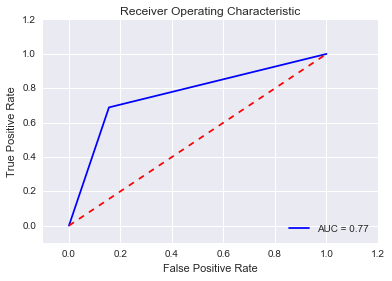

In [43]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
model.coef_

array([[  5.81292013e-01,   2.28556370e-01,  -4.85773066e-02,
         -1.56416673e+00,   9.48033608e-02,   2.33060932e-02,
         -1.41169130e-01,  -9.35299827e-02,  -1.14985683e-01,
         -3.36794913e-01,  -5.38234122e-01,  -5.46301505e-01,
          2.42012865e-01,   8.11803946e-04,  -1.52533837e-02,
         -6.18245176e-01]])

In [49]:
df.drop('conversion', axis=1).columns

Index([u'click_1', u'page_view_1', u'pastime_30', u'product_image_click_1',
       u'product_image_hover_1', u'reactive_1', u'scroll_percent_40',
       u'scroll_percent_60', u'scroll_percent_80', u'scroll_percent_100',
       u'social_click_1', u'tab_click_1', u'wish_list_add_click_1',
       u'mouse_way_sum', u'mouse_velocity_avg', u'text_selection_1'],
      dtype='object')

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.91566666666666663

In [10]:
n = 5000
sample1 = data.loc[data.conversion == 1].sample(n=n, replace=False)
sample2 = data.loc[data.conversion == 0].sample(n=n, replace=False)
df = pd.concat([sample1, sample2])
df = df.sample(frac=1)
X = df.drop('conversion', axis=1)  
y = df.loc[:, 'conversion']

In [69]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print scores
print scores.mean() 

[ 0.8    0.788  0.763  0.798  0.786  0.76   0.785  0.781  0.788  0.761]
0.781


In [72]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime
start_time = datetime.now()

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print scores.mean()                             

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print scores.mean()                             

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print scores.mean()

clf = LogisticRegression()
scores = cross_val_score(clf, X, y, cv=10)
print scores.mean()

clf = AdaBoostClassifier(n_estimators=10)
scores = cross_val_score(clf, X, y, cv=10)
print scores.mean()

clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
    max_depth=None, random_state=0).fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=10)
print scores.mean()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

0.781
0.8037
0.7947
0.7622
0.8124
Duration: 0:00:04.016171


In [67]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.76 (+/- 0.01) [Logistic Regression]
Accuracy: 0.81 (+/- 0.01) [Random Forest]
Accuracy: 0.57 (+/- 0.01) [naive Bayes]
Accuracy: 0.76 (+/- 0.01) [Ensemble]


In [78]:
import xgboost as xgb

dtrain = xgb.DMatrix( X, label=y)
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic'}
num_round = 10

print ('running cross validation')
# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric
xgb.cv(param, dtrain, num_round, nfold=5,
       metrics={'error'}, seed = 0)
bst = xgb.train( plst, dtrain, num_round, evallist )

running cross validation


,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.2197,0.012234,0.219700,0.003058
1,0.2197,0.012234,0.219700,0.003058
2,0.1872,0.008778,0.187200,0.002195
3,0.1868,0.009309,0.186625,0.001708
4,0.1876,0.009173,0.185375,0.001975
5,0.1878,0.009304,0.184650,0.001999
6,0.1882,0.010260,0.183325,0.000761
7,0.1881,0.010970,0.181450,0.001398
8,0.1877,0.011187,0.179775,0.001495
9,0.1871,0.010984,0.179275,0.001803


In [1]:
xgb.plot_importance(bst)

NameError: name 'xgb' is not defined

Feature ranking:
1. feature 0 (0.399000)
2. feature 1 (0.147948)
3. feature 13 (0.079633)
4. feature 3 (0.070246)
5. feature 14 (0.064988)
6. feature 2 (0.049015)
7. feature 6 (0.043531)
8. feature 5 (0.035981)
9. feature 7 (0.025928)
10. feature 11 (0.019664)
11. feature 4 (0.019546)
12. feature 8 (0.016271)
13. feature 15 (0.014711)
14. feature 9 (0.011219)
15. feature 12 (0.001626)
16. feature 10 (0.000693)


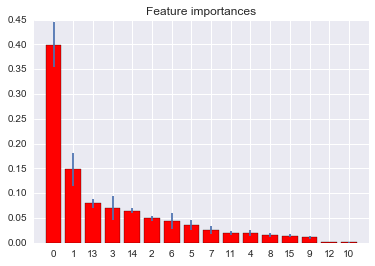

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
X.columns

Index([u'click_1', u'page_view_1', u'pastime_30', u'product_image_click_1',
       u'product_image_hover_1', u'reactive_1', u'scroll_percent_40',
       u'scroll_percent_60', u'scroll_percent_80', u'scroll_percent_100',
       u'social_click_1', u'tab_click_1', u'wish_list_add_click_1',
       u'mouse_way_sum', u'mouse_velocity_avg', u'text_selection_1'],
      dtype='object')

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=6).fit_transform(X, y)
print X_new.shape
X_new.head(5)

(10000, 6)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [13]:
import sklearn.cross_validation as cv
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import metrics
from datetime import datetime

start_time = datetime.now()

clf = LogisticRegression()
scores = cv.cross_val_score(clf, X_new, y, cv=10)
predicted = cv.cross_val_predict(clf, X_new, y, cv=10)
print 'Logistic Regression \n'
print 'The average accuracy score is: %0.2f'% metrics.accuracy_score(y, predicted)
print 'Confusion Matrix: \n', metrics.confusion_matrix(y, predicted)
print 'Classification Report: \n' + metrics.classification_report(y, predicted) + '\n'  

clf = SVC(random_state=0)
scores = cv.cross_val_score(clf, X_new, y, cv=10)
predicted = cv.cross_val_predict(clf, X_new, y, cv=10)
print 'SVC \n'
print 'The average accuracy score is: %0.2f'% metrics.accuracy_score(y, predicted)
print 'Confusion Matrix: \n', metrics.confusion_matrix(y, predicted)
print 'Classification Report: \n' + metrics.classification_report(y, predicted) + '\n'  

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1,
    random_state=0)
scores = cv.cross_val_score(clf, X_new, y, cv=10)
predicted = cv.cross_val_predict(clf, X_new, y, cv=10)
print 'Decision Tree \n'
print 'The average accuracy score is: %0.2f'% metrics.accuracy_score(y, predicted)
print 'Confusion Matrix: \n', metrics.confusion_matrix(y, predicted)
print 'Classification Report: \n' + metrics.classification_report(y, predicted) + '\n'                            

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=1, random_state=0)
scores = cv.cross_val_score(clf, X_new, y, cv=10)
predicted = cv.cross_val_predict(clf, X_new, y, cv=10)
print 'Random Forest \n'
print 'The average accuracy score is: %0.2f'% metrics.accuracy_score(y, predicted)
print 'Confusion Matrix: \n', metrics.confusion_matrix(y, predicted)
print 'Classification Report: \n' + metrics.classification_report(y, predicted) + '\n'                                

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=1, random_state=0)
scores = cv.cross_val_score(clf, X_new, y, cv=10)
predicted = cv.cross_val_predict(clf, X_new, y, cv=10)
print 'ExtraTrees \n'
print 'The average accuracy score is: %0.2f'% metrics.accuracy_score(y, predicted)
print 'Confusion Matrix: \n', metrics.confusion_matrix(y, predicted)
print 'Classification Report: \n' + metrics.classification_report(y, predicted) + '\n'  

clf = AdaBoostClassifier(n_estimators=10)
scores = cv.cross_val_score(clf, X, y, cv=10)
predicted = cv.cross_val_predict(clf, X, y, cv=10)
print 'AdaBoost \n'
print 'The average accuracy score is: %0.2f'% metrics.accuracy_score(y, predicted)
print 'Confusion Matrix: \n', metrics.confusion_matrix(y, predicted)
print 'Classification Report: \n' + metrics.classification_report(y, predicted) + '\n'  

clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
    max_depth=None, random_state=0)
scores = cv.cross_val_score(clf, X_new, y, cv=10)
predicted = cv.cross_val_predict(clf, X_new, y, cv=10)
print 'Gradient Boosting \n'
print 'The average accuracy score is: %0.2f'% metrics.accuracy_score(y, predicted)
print 'Confusion Matrix: \n', metrics.confusion_matrix(y, predicted)
print 'Classification Report: \n' + metrics.classification_report(y, predicted) + '\n'  

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Logistic Regression 

The average accuracy score is: 0.70
Confusion Matrix: 
[[4148  852]
 [2182 2818]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.66      0.83      0.73      5000
          1       0.77      0.56      0.65      5000

avg / total       0.71      0.70      0.69     10000


SVC 

The average accuracy score is: 0.74
Confusion Matrix: 
[[3235 1765]
 [ 803 4197]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.80      0.65      0.72      5000
          1       0.70      0.84      0.77      5000

avg / total       0.75      0.74      0.74     10000


Decision Tree 

The average accuracy score is: 0.74
Confusion Matrix: 
[[3806 1194]
 [1405 3595]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.73      0.76      0.75      5000
          1       0.75      0.72      0.73      5000

avg / total       0.74      0.74      0.74   

In [5]:
import sklearn.cross_validation as cv
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [6]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1,
    random_state=0)
scores = cv.cross_val_score(clf, X, y, cv=10)
predicted = cv.cross_val_predict(clf, X, y, cv=10)
print 'Decision Tree \n'
print 'The average accuracy score is: %0.2f'% metrics.accuracy_score(y, predicted)
print 'Confusion Matrix: \n', metrics.confusion_matrix(y, predicted)
print 'Classification Report: \n' + metrics.classification_report(y, predicted) + '\n'                            

Decision Tree 

The average accuracy score is: 0.79
Confusion Matrix: 
[[3813 1187]
 [ 957 4043]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.80      0.76      0.78      5000
          1       0.77      0.81      0.79      5000

avg / total       0.79      0.79      0.79     10000




In [9]:
from IPython import display
from sklearn.externals.six import StringIO
from sklearn import datasets, utils, tree
import pydot

clf.fit(X,y)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
dot_data.getvalue()

graph = pydot.graph_from_dot_data(dot_data.getvalue())
print '"graph" is object of type {}'.format(type(graph))

display.Image(graph.create_png())

NameError: global name 'dot_parser' is not defined